In [75]:
import cv2

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import os
from PIL import Image
import pickle
import keras
from keras.layers import *
from keras.applications.vgg16 import VGG16
from keras import Model
from keras.utils import multi_gpu_model
from keras import backend as K
from keras.models import load_model
import sklearn

In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
epochs = 300
data_path = "./cached_data/"

In [4]:
with open(os.path.join(data_path,"tag2label.pkl"),"rb") as f:
    tag2label = pickle.loads(f.read())
with open(os.path.join(data_path,"most_freq_chara_tags.pkl"),"rb") as f:
    most_freq_chara_tags = pickle.loads(f.read())
with open(os.path.join(data_path,"most_freq_copyright_tags.pkl"),"rb") as f:
    most_freq_copyright_tags = pickle.loads(f.read())
with open(os.path.join(data_path,"most_freq_general_tags.pkl"),"rb") as f:
    most_freq_general_tags = pickle.loads(f.read())    

In [5]:
label2tag = {}    
for k,v in tag2label.items():
    print(k,v)
    label2tag[v] = k

hatsune miku 0
hakurei reimu 1
kirisame marisa 2
remilia scarlet 3
character request 4
izayoi sakuya 5
flandre scarlet 6
patchouli knowledge 7
cirno 8
yakumo yukari 9
kochiya sanae 10
konpaku youmu 11
alice margatroid 12
admiral (kantai collection) 13
fujiwara no mokou 14
shameimaru aya 15
hong meiling 16
kaname madoka 17
akemi homura 18
komeiji koishi 19
saigyouji yuyuko 20
reisen udongein inaba 21
saber 22
komeiji satori 23
miki sayaka 24
inubashiri momiji 25
kagamine rin 26
kaga (kantai collection) 27
yakumo ran 28
rumia 29
sakura kyouko 30
moriya suwako 31
chen 32
kamishirasawa keine 33
kazami yuuka 34
konpaku youmu (ghost) 35
tomoe mami 36
reiuji utsuho 37
kawashiro nitori 38
tatara kogasa 39
hibiki (kantai collection) 40
hinanawi tenshi 41
houraisan kaguya 42
kaenbyou rin 43
kagamine len 44
kongou (kantai collection) 45
inazuma (kantai collection) 46
akagi (kantai collection) 47
inaba tewi 48
koakuma 49
mystia lorelei 50
ibuki suika 51
megurine luka 52
shimakaze (kantai collectio

mahou shoujo lyrical nanoha vivid 981
my-hime 982
dagashi kashi 983
gegege no kitarou 984
akame ga kill! 985
beatmania 986
busou shinki 987
naruto: the last 988
yuyushiki 989
shoujo kakumei utena 990
high school fleet 991
kin-iro mosaic 992
ar tonelico 993
sengoku basara 994
futari wa pretty cure 995
d.gray-man 996
castlevania 997
digimon adventure 998
nyantype 999
a.i. channel 1000
rurouni kenshin 1001
rockman x 1002
gabriel dropout 1003
mabinogi 1004
ghibli 1005
gakkou gurashi! 1006
inu x boku ss 1007
souls (from software) 1008
shinkai no valkyrie 1009
cookie (touhou) 1010
armored core: for answer 1011
beatmania iidx 1012
high speed! 1013
shugo chara! 1014
shining (series) 1015
super sentai 1016
inazuma eleven go galaxy 1017
hokuto no ken 1018
koutetsujou no kabaneri 1019
pokemon sm (anime) 1020
pixiv fantasia t 1021
saga 1022
owari no seraph 1023
solo 1024
long hair 1025
1girl 1026
highres 1027
smile 1028
short hair 1029
blush 1030
looking at viewer 1031
open mouth 1032
blue eyes 10

In [6]:
import PIL
import matplotlib.pyplot as plt

In [ ]:
def get_model():
    for i in range(epochs):
        e = epochs - i
        if(os.path.exists("run_vgg_v4_at_epoch_%d.h5"%e)):
            return load_model("run_vgg_v4_at_epoch_29.h5")
           #return load_model("run_vgg_v2_at_epoch_%d.h5"%e)
model = get_model()    

In [6]:
pic = "test_imgs/asuna1.jpg"

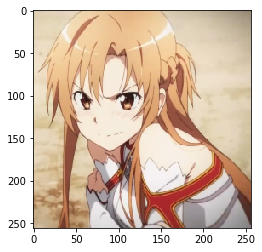

In [351]:
test_img = cv2.imread(pic)
test_img = cv2.resize(test_img,(256,256))
test_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB)
plt.imshow(test_img)
test_img = np.asarray(test_img) / 255.
test_img = np.reshape(test_img,(1,256,256,3))


In [352]:
y0,y1,y2 = model.predict(test_img)
text_list=[]
color_list=[]
for i,p in enumerate(list(y0[0])):
    #print(p)
    if(p > 0.4):
        print(i,label2tag[i],p)
        text_list.append(label2tag[i]+" %.2f"%p)
        color_list.append(0)
for i,p in enumerate(list(y1[0])):
    #print(p)
    if(p > 0.4):
        print(i+512,label2tag[i+512],p)
        text_list.append(label2tag[i+512]+" %.2f"%p)
        color_list.append(1)
for i,p in enumerate(list(y2[0])):
    #print(p)
    if(p > 0.3):
        print(i+512*2,label2tag[i+512*2],p) 
        text_list.append(label2tag[i+512*2]+" %.2f"%p)
        color_list.append(2)

246 asuna (sao) 0.94968444
815 yahari ore no seishun lovecome wa machigatteiru. 0.47609872
1024 solo 0.3778403
1025 long hair 0.69162554
1026 1girl 0.404918
1027 highres 0.41641253
1028 smile 0.3436319
1030 blush 0.47362974
1035 blonde hair 0.3738764
1036 multiple girls 0.33283234
1037 brown hair 0.38041824


In [353]:
raw_img = cv2.imread(pic)
raw_img = cv2.resize(raw_img,(800,800))
raw_img = np.asarray(cv2.cvtColor(raw_img,cv2.COLOR_BGR2RGB))

for i,(s,c) in enumerate(zip(text_list,color_list)):
    #print(s,c)
    if(c==0):
        color=(255,0,0)
    elif(c==1):
        color=(0,255,0)
    else:
        color=(0,0,255)
    cv2.putText(raw_img, s, (300, (i * 35) + 55), 
		cv2.FONT_HERSHEY_SIMPLEX, 1, color, 3)


True

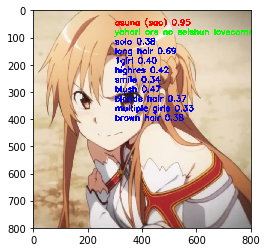

In [355]:

plt.imshow(raw_img)
cv2.imwrite(os.path.basename(pic),cv2.cvtColor(raw_img,cv2.COLOR_BGR2RGB))